In [47]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
pd.set_option('display.max_columns', None)
%matplotlib inline

In [157]:
X_train = pd.read_csv('data/olympics_final_X_date',sep = '|',lineterminator='\n')
y_all = pd.read_csv('data/olympics_final_y_date',sep = '|',lineterminator='\n',header=None)

In [158]:
def plot_roc(model, x_columns, y_true):

   y_pred = model.predict_proba(x_columns)

   fpr, tpr, threshold = roc_curve(y_true, y_pred[:,1])
   area_under_curve = auc(fpr, tpr)

   # method I: plt
   fig, ax = plt.subplots()
   model_name = str(type(model))
   plt.title(f'{model_name} ROC')
   ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

   ax.legend(loc = 'lower right')
   ax.plot([0, 1], [0, 1],'r--')
   plt.xlim([0, 1])
   plt.ylim([0, 1])
   plt.ylabel('True Positive Rate')
   plt.xlabel('False Positive Rate')
   plt.show()

In [159]:
X_train

,Date,last_year,month,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,1,2,3,4,5,6,7,8,9,10,11,12,Coast,Dogs not allowed,Established campsites,Fall foilage,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife,elevation_gain,highest_point,lat,long,numReports,number_votes,total_distance,stars,distance_from_median,neighbors_average condition|snow,station_distance,LATITUDE,LONGITUDE,ELEVATION,AWND,CDSD,CLDD,DP01,DP10,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,EMNT,EMSD,EMSN,EMXP,EMXT,FZF0,FZF1,FZF2,FZF3,FZF4,FZF5,FZF6,FZF7,FZF8,FZF9,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WDFG,WSF2,WSF5,WSFG
0,2018-05-06,2017,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.50,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
1,2018-05-05,2017,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.55,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
2,2018-05-05,2017,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.50,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
3,2018-04-25,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.90,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
4,2018-04-22,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.95,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
5,2018-04-21,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.90,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
6,2018-04-21,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.95,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0
7,2018-04-20,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.90,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.

In [185]:
weather_test = X_train[['DSND','DSNW','DT00','DX32','EMSD','EMSN','FZF2','FZF3','FZF4','FZF9','SNOW','TSUN','WDFG','WSFG']]

In [187]:
weather_test

,DSND,DSNW,DT00,DX32,EMSD,EMSN,FZF2,FZF3,FZF4,FZF9,SNOW,TSUN,WDFG,WSFG
66,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
weather_test.astype(bool).sum(axis=0)

DSND       0
DSNW       0
DT00       0
DX32    1442
EMSD       0
EMSN       0
FZF2    2756
FZF3    1733
FZF4     658
FZF9      61
SNOW       0
TSUN       0
WDFG       0
WSFG       0
dtype: int64

In [189]:
X_train.astype(bool).sum(axis=0)

1997      32
1998      90
1999     167
2000     179
2001     149
2002     201
2003     179
2004     189
2005     191
2006     249
2007     288
2008     306
2009     297
2010     391
2011     551
2012     623
2013     784
2014     962
2015    1335
2016    2136
2017       0
2018       0
1        474
2        504
3        638
4        857
5       1122
6       1239
7       1486
8       1055
        ... 
DX90    1691
EMNT    3339
EMSD       0
EMSN       0
EMXP    4321
EMXT    4004
FZF0    3333
FZF1    3178
FZF2    2756
FZF3    1733
FZF4     658
FZF5    3339
FZF6    3326
FZF7    2210
FZF8     540
FZF9      61
HDSD    3762
HTDD    3762
PRCP    4321
SNOW       0
TAVG    3332
TMAX    4004
TMIN    3339
TSUN       0
WDF2    1598
WDF5    1598
WDFG       0
WSF2    1598
WSF5    1598
WSFG       0
Length: 101, dtype: int64

In [165]:
df = pd.concat([X_train,y_all], axis=1)

In [166]:
df = df.drop(0,axis=1)

In [167]:
df['Trail'] = df_names['Trail']

In [168]:
test = df[df['last_year'] >= 2016]
train = df[df['last_year'] < 2016]

In [169]:
test

,Date,last_year,month,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,1,2,3,4,5,6,7,8,9,10,11,12,Coast,Dogs not allowed,Established campsites,Fall foilage,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife,elevation_gain,highest_point,lat,long,numReports,number_votes,total_distance,stars,distance_from_median,neighbors_average condition|snow,station_distance,LATITUDE,LONGITUDE,ELEVATION,AWND,CDSD,CLDD,DP01,DP10,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,EMNT,EMSD,EMSN,EMXP,EMXT,FZF0,FZF1,FZF2,FZF3,FZF4,FZF5,FZF6,FZF7,FZF8,FZF9,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WDFG,WSF2,WSF5,WSFG,1,Trail
0,2018-05-06,2017,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.50,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,True,Mount Rose
1,2018-05-05,2017,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.55,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,False,Mount Rose
2,2018-05-05,2017,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.50,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,True,Mount Rose
3,2018-04-25,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.90,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,True,Mount Rose
4,2018-04-22,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.95,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,False,Mount Rose
5,2018-04-21,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.90,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,True,Mount Rose
6,2018-04-21,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.95,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0.0,52.0,5.0,16.0,0.0,0.0,4.46,98.0,29.0,27.0,0.0,0.0,0.0,31.0,27.0,23.0,17.0,0.0,5749.0,5749.0,109.62,0.0,49.4,57.6,41.1,0.0,150.0,160.0,0.0,35.1,53.9,0.0,False,Mount Rose
7,2018-04-20,2017,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3500.0,4301.0,47.4956,-123.2676,270,24.0,6.4,3.67,278.545589,0.90,108.155008,47.9375,-124.555,56.4,5.6,69.0,69.0,188.0,139.0,0.0,0.0,0.0,59.0,0

In [170]:
test_X = test.drop(['Date','last_year','month','Trail',1], axis=1)
train_X= train.drop(['Date','last_year','month','Trail',1], axis=1) 

In [171]:
test_y = test[1]
train_y = train[1]

Try dropping all columns under .01 feature importance

In [139]:
test_X = test_X.drop(drops,axis=1)

ValueError: labels ['HDSD' 'DX70' 'HTDD' 'EMXT' '2004' 'Mountain views' 'Ridges/passes'
 'Rivers' 'TMIN' 'TAVG' 'Lakes' 'Good for kids' 'Wildflowers/Meadows'
 'FZF0' 'Established campsites' 'Wildlife' 'DT32' 'Old growth' 'CLDD'
 'None' 'Summits' '2005' 'Dogs not allowed' 'CDSD' 'ELEVATION'
 'Northwest Forest Pass' 'FZF1' 'EMNT' '2008' 'Waterfalls' 'FZF6'
 ' Hood Canal' '2012' 'LONGITUDE' 'LATITUDE' 'DX32' 'FZF3' 'FZF7'
 'National Park Pass' 'FZF5' 'FZF2' ' Northern Coast' '2006' 'WDF2' 'WSF2'
 '2011' 'AWND' 'Hurricane Ridge Snowshoe' 'Coast' 'WSF5' '2000' 'WDF5'
 'Mount Ellinor' ' Pacific Coast' '1999' 'DX90' 'Discover Pass'
 'Tunnel Creek' '2007' '2010' 'Lake of the Angels' 'Upper Lena Lake' '1998'
 'FZF4' 'Mount Townsend' 'FZF8' ' Kitsap Peninsula' '2003'
 'Marmot Pass via Upper Dungeness River Trail'
 'Marmot Pass - Upper Big Quilcene' ' Olympia' '2009'
 'West Fork Dosewallips River' 'Lena Lake'
 'Tubal Cain Mine to Buckhorn Lake' 'Dosewallips River Road' '2002'
 'Little Quilcene River' 'Duckabush River' 'Olympic Hot Springs'
 'Mount Rose' 'Lake Angeles' 'Royal Basin - Royal Lake' 'Mount Jupiter'
 'High Divide - Seven Lakes Basin Loop' 'Heather Park' 'Mildred Lakes'
 'Klahhane Ridge' 'The Brothers' 'Mount Zion' 'Deer Ridge' 'NaN'
 'Mount Walker' 'Grand Ridge' 'Hurricane Hill' 'Grand Valley'
 'North Fork Skokomish River' 'North Fork Quinault River and Halfway House'
 'Happy Lake Ridge' '2001' 'Slab Camp Creek and Gray Wolf River'
 'Bogachiel Peak' 'Lower Gray Wolf River' 'Wagonwheel Lake'
 'Lower Big Quilcene River' 'Silver Lakes' 'Big Creek'
 'Elwha To Hurricane Hill' '1997' 'Switchback'
 'Elwha River and Lillian River'
 'North Fork Skokomish River and Flapjack Lakes'
 'Lena Lake - Valley of Silent Men Snowshoe' 'Tubal Cain Mine'
 'Upper South Fork Skokomish River' 'Mount Angeles'
 'Quinault River-Pony Bridge-Enchanted Valley' 'Appleton Pass'
 'Church Creek' 'Lake Constance' 'Mount Muller'
 'Backcountry camping permit. Register in person at ranger station (no fee)'
 'Lower Dungeness River' 'Home Lake' 'Mount Townsend Snowshoe'
 'Pyramid Mountain / Pyramid Peak' 'Constance Pass' 'Staircase Rapids'
 'Buckhorn Mountain' 'Murhut Falls' "Pete's Creek - Colonel Bob Peak"
 'Hoh River Trail to Five Mile Island' 'Sol Duc Falls' 'Dry Creek'
 'Boulder Lake (Olympics)' 'Deadfall' 'Elwha River and Geyser Valley'
 'Notch Pass' 'Wynoochee Pass to Sundown Lake' 'Copper Creek'
 'Fletcher Canyon' 'Tunnel Creek - Dosewallips Trailhead'
 'Lower South Fork Skokomish River'
 'Heather Creek Trail via Upper Dungeness River' 'Three Lakes'
 'Colonel Bob Trail - Colonel Bob Peak' 'Green Mountain - Gold Creek Trail'
 'Wynoochee Lake' 'Dirty Face Ridge'
 'Mount Townsend - Silver Lakes Traverse' 'Marymere Falls' 'Wolf Creek'
 'Baldy' 'Mink Lake to Little Divide' 'Mount Storm King' 'Graves Creek'
 ' Methow/Sawtooth' 'Capitol State Forest - Capitol Peak'
 'Refuge Entrance Pass' 'Barnes Creek' 'Dungeness Spit' 'Jefferson Ridge'
 'North Fork Sol Duc River' 'Lillian River' 'Gladys Divide'
 'Blue Mountain - Deer Park Snowshoe'
 'Ranger Hole - Interrorem Nature Trail' 'Lillian Ridge' 'Aurora Creek'
 'Cascade Rock' 'Hoh River Trail to Blue Glacier'
 'Grand Valley via Grand Pass Trail' 'Spider Lake' 'Twanoh State Park'
 'Spruce Railroad Trail' 'Griff Creek' 'Snider-Jackson Traverse'
 'Six Ridge' 'Cape Alava' 'Kloshe Nanitch' 'Elbo Creek'
 'Capitol State Forest - Sherman Creek Loop' 'Welch Peaks' 'Striped Peak'
 'Elk Lakes' 'South Fork Hoh River - Big Flat' 'Mink Lake'
 'Bogachiel River' 'Dosewallips State Park - Steam Donkey Trail'
 'Fallsview Canyon (Falls View)' 'Upper Dungeness River'
 'Cape Alava Loop (Ozette Triangle)'
 'Shi Shi Beach and Point of the Arches' 'Mima Mounds' 'Dodger Point'
 'Spoon Creek Falls' 'Cape Flattery' 'Rain Shadow Loop'
 'Indian Island County Park' 'Green Mountain - Wildcat Trail'
 'Mount Angeles Snowshoe' 'PJ Lake' 'FZF9' 'Guillemot Cove'
 'Capitol State Forest - Rock Candy Mountain' 'Ned Hill' 'West Elwha'
 'Smokey Bottom (West Lake Mills)'
 'Mary E. Theler Wetlands Nature Preserve'
 'South Coast Wilderness Trail - Toleak Point' 'West Fork Humptulips River'
 'Millersylvania State Park' 'Quinault National Recreation Trails'
 'Sunnybrook Meadows' 'Miller Peninsula-Thompson Spit'
 'Klahhane Ridge Snowshoe' 'Penrose Point State Park' 'Gold Mountain'
 "Heart O' the Forest" 'Hall of Mosses' 'Peabody Creek Trail'
 'Fort Flagler State Park' 'Eagle Point Snowshoe' 'Second Beach'
 'Quillayute River Slough' 'Anderson Lake State Park'
 'Capitol State Forest - McLane Creek' 'Third Beach'
 'Big Cedar Tree - Quinault' 'Ruby Beach' 'Newberry Hill Heritage Park'
 'Queets River' 'North Coast Route' 'Gibbs Lake' 'Hansville Greenway'
 'Westport State Park - Westport Light Trail' 'Illahee Forest Preserve'
 'McCormick Forest Park' 'Kestner Homestead' 'Elk Mountain to Maiden Peak'
 'Queets Campground Loop' 'Kalaloch - Browns Point' 'Tumwater Falls Park'
 'Deer Park to Maiden Peak' 'Foulweather Bluff Preserve Trail'
 'Harstine Island State Park' 'Glines Canyon Overlook Trail'
 'Watershed Park' 'Kopachuck State Park Trail' "Lower Pete's Creek"
 'Capitol State Forest - Mount Molly' 'Priest Point Park' 'Burfoot Park'
 'Banner Forest' 'Anderson Point' 'Big Tree Trail' 'Clear Creek Trail'
 'Cub Peak' 'Kalaloch Creek Nature Trail' 'Lightning Peak' 'Valhalla Peak'
 '2017' '2018' 'Fall foilage' 'Discover Pass, Sno-Parks Permit'
 'National Monument Fee' 'National Monument Fee, Sno-Parks Permit'
 'None, Northwest Forest Pass' 'Northwest Forest Pass, Sno-Parks Permit'
 'Oregon State Parks Day-Use' 'Sno-Parks Permit'
 'Wilderness permit. Self-issue at trailhead (no fee)' ' Bellingham Area'
 ' Blewett Pass' ' Chinook Pass - Hwy 410' ' Cle Elum Area'
 ' Columbia River Gorge - OR' ' Columbia River Gorge - WA'
 ' Cougar Mountain' ' Dark Divide' ' Entiat Mountains/Lake Chelan'
 ' Goat Rocks' ' Grand Coulee' ' Leavenworth Area' ' Lewis River Region'
 ' Long Beach Area' ' Mount Adams Area' ' Mount Baker Area'
 ' Mount St. Helens' ' Mountain Loop Highway' ' NE - Sunrise/White River'
 ' NW - Carbon River/Mowich' ' North Bend Area'
 ' North Cascades Highway - Hwy 20'
 ' Okanogan Highlands/Kettle River Range' ' Orcas Island'
 ' Palouse and Blue Mountains' ' Pasayten' ' Potholes Region'
 " SE - Cayuse Pass/Steven's Canyon" ' SW - Longmire/Paradise'
 ' Salmon La Sac/Teanaway' ' San Juan Islands' ' Seattle-Tacoma Area'
 ' Selkirk Range' ' Snoqualmie Pass' " Spokane Area/Coeur d'Alene"
 ' Squak Mountain' ' Stevens Pass - East' ' Stevens Pass - West'
 ' Tiger Mountain' ' Tri-Cities' ' Vancouver Area' ' Wenatchee'
 ' Whidbey Island' ' White Pass/Cowlitz River Valley' ' Yakima'
 'distance_from_median' 'DSND' 'DSNW' 'DT00' 'EMSD' 'EMSN' 'SNOW' 'TSUN'
 'WDFG' 'WSFG'] not contained in axis

In [141]:
train_X = train_X.drop(drops,axis=1)

In [172]:
train_X = train_X.drop(['lat','long'],axis=1)
test_X = test_X.drop(['lat','long'],axis=1)

In [173]:
test.shape,train.shape

((3069, 108), (9299, 108))

In [174]:
train_y.shape,train_X.shape

((9299,), (9299, 101))

In [175]:
X_train = train_X
y_train = train_y
X_test = test_X
y_test = test_y

In [177]:
y_train.shape, X_train.shape

((9299,), (9299, 101))

In [176]:
y_test.shape, X_test.shape

((3069,), (3069, 101))

In [178]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

ab_model = AdaBoostClassifier(n_estimators=100)
ab_model.fit(X_train, y_train)

kn_model = KNeighborsClassifier()
kn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

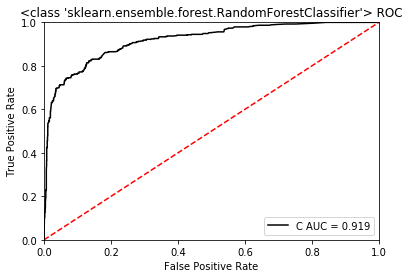

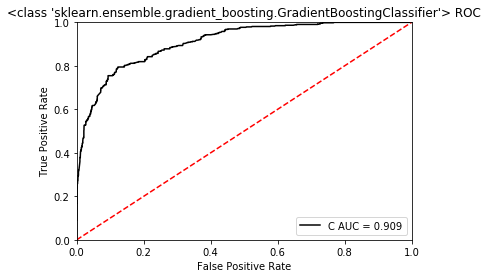

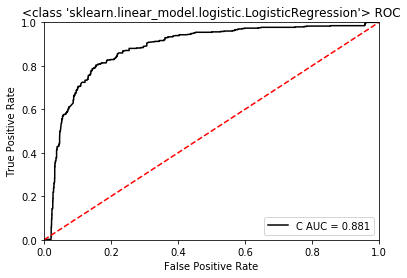

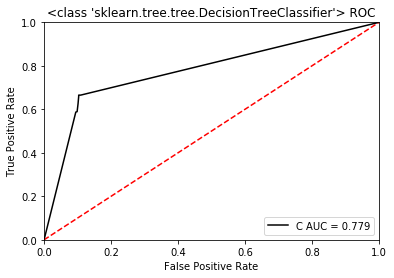

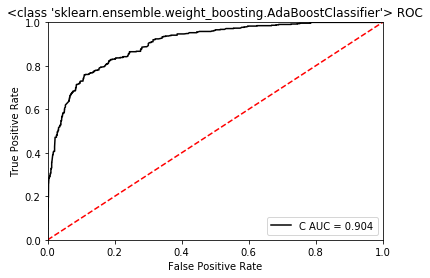

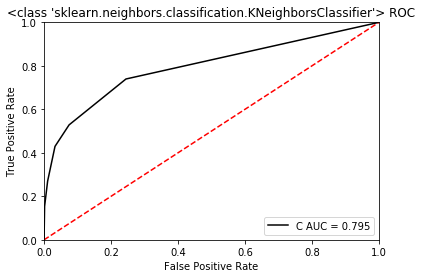

In [179]:
models = [rf_model, gb_model, lr_model, dt_model, ab_model, kn_model]
for model in models:
   plot_roc(model, X_test, y_test)

In [180]:
probs = lr_model.predict_proba(X_test)[:,1]

In [113]:
df_names = pd.read_csv('data/new_olympics_merged.csv', sep = '|',lineterminator='\n')

In [115]:
df_names['Trail']

0              Mount Rose
1              Mount Rose
2              Mount Rose
3              Mount Rose
4              Mount Rose
5              Mount Rose
6              Mount Rose
7              Mount Rose
8              Mount Rose
9              Mount Rose
10             Mount Rose
11             Mount Rose
12             Mount Rose
13             Mount Rose
14             Mount Rose
15             Mount Rose
16             Mount Rose
17             Mount Rose
18             Mount Rose
19             Mount Rose
20             Mount Rose
21             Mount Rose
22             Mount Rose
23             Mount Rose
24             Mount Rose
25             Mount Rose
26             Mount Rose
27             Mount Rose
28             Mount Rose
29             Mount Rose
               ...       
12338    Staircase Rapids
12339    Staircase Rapids
12340    Staircase Rapids
12341    Staircase Rapids
12342    Staircase Rapids
12343    Staircase Rapids
12344    Staircase Rapids
12345    Sta

In [124]:
df_probs = pd.DataFrame({'actual': y_test, 'prob of True': probs,'Date': test['Date'], 'Trail': test['Trail']})

In [125]:
df_probs

,Date,Trail,actual,prob of True
0,2018-05-06,Mount Rose,True,0.700596
1,2018-05-05,Mount Rose,False,0.723575
2,2018-05-05,Mount Rose,True,0.700596
3,2018-04-25,Mount Rose,True,0.887866
4,2018-04-22,Mount Rose,False,0.898553
5,2018-04-21,Mount Rose,True,0.887866
6,2018-04-21,Mount Rose,False,0.898553
7,2018-04-20,Mount Rose,True,0.887866
8,2018-04-20,Mount Rose,True,0.887866
9,2018-04-19,Mount Rose,True,0.887866


In [127]:
df_X_test = pd.read_csv('data/X_test_testit.csv', sep = '|')

In [128]:
df_X_test

,Coast,Dogs not allowed,Established campsites,Fall foilage,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife,elevation_gain,highest_point,lat,long,numReports,number_votes,total_distance,stars,Backcountry camping permit. Register in person at ranger station (no fee),Discover Pass,"Discover Pass, Sno-Parks Permit",National Monument Fee,"National Monument Fee, Sno-Parks Permit",National Park Pass,None,"None, Northwest Forest Pass",Northwest Forest Pass,"Northwest Forest Pass, Sno-Parks Permit",Oregon State Parks Day-Use,Refuge Entrance Pass,Sno-Parks Permit,Wilderness permit. Self-issue at trailhead (no fee),Bellingham Area,Blewett Pass,Chinook Pass - Hwy 410,Cle Elum Area,Columbia River Gorge - OR,Columbia River Gorge - WA,Cougar Mountain,Dark Divide,Entiat Mountains/Lake Chelan,Goat Rocks,Grand Coulee,Hood Canal,Kitsap Peninsula,Leavenworth Area,Lewis River Region,Long Beach Area,Methow/Sawtooth,Mount Adams Area,Mount Baker Area,Mount St. Helens,Mountain Loop Highway,NE - Sunrise/White River,NW - Carbon River/Mowich,North Bend Area,North Cascades Highway - Hwy 20,Northern Coast,Okanogan Highlands/Kettle River Range,Olympia,Orcas Island,Pacific Coast,Palouse and Blue Mountains,Pasayten,Potholes Region,SE - Cayuse Pass/Steven's Canyon,SW - Longmire/Paradise,Salmon La Sac/Teanaway,San Juan Islands,Seattle-Tacoma Area,Selkirk Range,Snoqualmie Pass,Spokane Area/Coeur d'Alene,Squak Mountain,Stevens Pass - East,Stevens Pass - West,Tiger Mountain,Tri-Cities,Vancouver Area,Wenatchee,Whidbey Island,White Pass/Cowlitz River Valley,Yakima,NaN,distance_from_median,neighbors_average condition|road,station_distance,LATITUDE,LONGITUDE,ELEVATION,AWND,CDSD,CLDD,DP01,DP10,DSND,DSNW,DT00,DT32,DX32,DX70,DX90,EMNT,EMSD,EMSN,EMXP,EMXT,FZF0,FZF1,FZF2,FZF3,FZF4,FZF5,FZF6,FZF7,FZF8,FZF9,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WDFG,WSF2,WSF5,WSFG,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River

In [129]:
rf_model.feature_importances_

array([  5.01901133e-06,   5.29473749e-09,   3.04438383e-04,
         9.16308547e-05,   1.53550050e-04,   5.39586511e-09,
         1.33368404e-04,   4.62518212e-06,   4.02280941e-04,
         0.00000000e+00,   1.11913016e-04,   4.51175324e-04,
         5.60269125e-05,   2.18287626e-04,   2.52713292e-04,
         2.01531660e-07,   7.43193529e-05,   5.02278799e-05,
         4.10096288e-05,   1.38480593e-04,   4.72094481e-06,
         3.05058946e-07,   2.13112685e-05,   6.58520764e-05,
         8.28706064e-05,   2.98458907e-04,   0.00000000e+00,
         1.67388792e-04,   2.63188974e-04,   1.95362630e-04,
         0.00000000e+00,   2.17837962e-04,   1.02900024e-06,
         5.22577105e-04,   1.59052460e-04,   4.50103743e-05,
         7.30818044e-04,   5.55698011e-05,   2.32555565e-04,
         6.79377050e-04,   1.29048102e-04,   5.23388540e-06,
         6.74922707e-05,   6.22473480e-05,   1.50644062e-06,
         2.08158679e-04,   3.85158954e-04,   3.87697037e-04,
         5.30404303e-05,

In [181]:
feature_values = {}
for i in range(len(rf_model.feature_importances_)):
   feature_values[X_test.columns[i]] = rf_model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('neighbors_average condition|snow', 0.24816677321028574),
 ('highest_point', 0.044748123722332354),
 ('elevation_gain', 0.038278499135804341),
 ('station_distance', 0.03117181262743552),
 ('total_distance', 0.028456046241451781),
 ('numReports', 0.026665862152566607),
 ('stars', 0.026501384854462247),
 ('5', 0.024608883151572045),
 ('number_votes', 0.02407400594126366),
 ('7', 0.023480554203481285),
 ('6', 0.021551314115314874),
 ('4', 0.019761865724986012),
 ('8', 0.018438055891028378),
 ('3', 0.018251885275396746),
 ('DP01', 0.016342718781514096),
 ('12', 0.016135618088165434),
 ('2', 0.0157952525099526),
 ('DP10', 0.015076335325585123),
 ('2015', 0.014962150542225872),
 ('11', 0.014366928270397426),
 ('2013', 0.014000200748070466),
 ('1', 0.013931961294748404),
 ('9', 0.012809851090287946),
 ('PRCP', 0.011912821295990578),
 ('2016', 0.011289431719210447),
 ('EMXP', 0.0095639203705385461),
 ('2014', 0.0092763126737349256),
 ('10', 0.0092310781633142998),
 ('TMAX', 0.008469440841731

In [134]:
[name[0] for name in top_features]

['neighbors_average condition|snow',
 'highest_point',
 '5',
 '7',
 '6',
 'elevation_gain',
 '4',
 '8',
 '3',
 'station_distance',
 'long',
 'lat',
 '12',
 'total_distance',
 '2',
 'stars',
 '11',
 'numReports',
 '2015',
 '1',
 '2013',
 'number_votes',
 '9',
 'DP01',
 '2016',
 'DP10',
 '2014',
 '10',
 'PRCP',
 'EMXP',
 'TMAX',
 'HDSD',
 'DX70',
 'HTDD',
 'EMXT',
 '2004',
 'Mountain views',
 'Ridges/passes',
 'Rivers',
 'TMIN',
 'TAVG',
 'Lakes',
 'Good for kids',
 'Wildflowers/Meadows',
 'FZF0',
 'Established campsites',
 'Wildlife',
 'DT32',
 'Old growth',
 'CLDD',
 'None',
 'Summits',
 '2005',
 'Dogs not allowed',
 'CDSD',
 'ELEVATION',
 'Northwest Forest Pass',
 'FZF1',
 'EMNT',
 '2008',
 'Waterfalls',
 'FZF6',
 ' Hood Canal',
 '2012',
 'LONGITUDE',
 'LATITUDE',
 'DX32',
 'FZF3',
 'FZF7',
 'National Park Pass',
 'FZF5',
 'FZF2',
 ' Northern Coast',
 '2006',
 'WDF2',
 'WSF2',
 '2011',
 'AWND',
 'Hurricane Ridge Snowshoe',
 'Coast',
 'WSF5',
 '2000',
 'WDF5',
 'Mount Ellinor',
 ' Paci

In [136]:
drops = ['HDSD','DX70',
 'HTDD',
 'EMXT',
 '2004',
 'Mountain views',
 'Ridges/passes',
 'Rivers',
 'TMIN',
 'TAVG',
 'Lakes',
 'Good for kids',
 'Wildflowers/Meadows',
 'FZF0',
 'Established campsites',
 'Wildlife',
 'DT32',
 'Old growth',
 'CLDD',
 'None',
 'Summits',
 '2005',
 'Dogs not allowed',
 'CDSD',
 'ELEVATION',
 'Northwest Forest Pass',
 'FZF1',
 'EMNT',
 '2008',
 'Waterfalls',
 'FZF6',
 ' Hood Canal',
 '2012',
 'LONGITUDE',
 'LATITUDE',
 'DX32',
 'FZF3',
 'FZF7',
 'National Park Pass',
 'FZF5',
 'FZF2',
 ' Northern Coast',
 '2006',
 'WDF2',
 'WSF2',
 '2011',
 'AWND',
 'Hurricane Ridge Snowshoe',
 'Coast',
 'WSF5',
 '2000',
 'WDF5',
 'Mount Ellinor',
 ' Pacific Coast',
 '1999',
 'DX90',
 'Discover Pass',
 'Tunnel Creek',
 '2007',
 '2010',
 'Lake of the Angels',
 'Upper Lena Lake',
 '1998',
 'FZF4',
 'Mount Townsend',
 'FZF8',
 ' Kitsap Peninsula',
 '2003',
 'Marmot Pass via Upper Dungeness River Trail',
 'Marmot Pass - Upper Big Quilcene',
 ' Olympia',
 '2009',
 'West Fork Dosewallips River',
 'Lena Lake',
 'Tubal Cain Mine to Buckhorn Lake',
 'Dosewallips River Road',
 '2002',
 'Little Quilcene River',
 'Duckabush River',
 'Olympic Hot Springs',
 'Mount Rose',
 'Lake Angeles',
 'Royal Basin - Royal Lake',
 'Mount Jupiter',
 'High Divide - Seven Lakes Basin Loop',
 'Heather Park',
 'Mildred Lakes',
 'Klahhane Ridge',
 'The Brothers',
 'Mount Zion',
 'Deer Ridge',
 'NaN',
 'Mount Walker',
 'Grand Ridge',
 'Hurricane Hill',
 'Grand Valley',
 'North Fork Skokomish River',
 'North Fork Quinault River and Halfway House',
 'Happy Lake Ridge',
 '2001',
 'Slab Camp Creek and Gray Wolf River',
 'Bogachiel Peak',
 'Lower Gray Wolf River',
 'Wagonwheel Lake',
 'Lower Big Quilcene River',
 'Silver Lakes',
 'Big Creek',
 'Elwha To Hurricane Hill',
 '1997',
 'Switchback',
 'Elwha River and Lillian River',
 'North Fork Skokomish River and Flapjack Lakes',
 'Lena Lake - Valley of Silent Men Snowshoe',
 'Tubal Cain Mine',
 'Upper South Fork Skokomish River',
 'Mount Angeles',
 'Quinault River-Pony Bridge-Enchanted Valley',
 'Appleton Pass',
 'Church Creek',
 'Lake Constance',
 'Mount Muller',
 'Backcountry camping permit. Register in person at ranger station (no fee)',
 'Lower Dungeness River',
 'Home Lake',
 'Mount Townsend Snowshoe',
 'Pyramid Mountain / Pyramid Peak',
 'Constance Pass',
 'Staircase Rapids',
 'Buckhorn Mountain',
 'Murhut Falls',
 "Pete's Creek - Colonel Bob Peak",
 'Hoh River Trail to Five Mile Island',
 'Sol Duc Falls',
 'Dry Creek',
 'Boulder Lake (Olympics)',
 'Deadfall',
 'Elwha River and Geyser Valley',
 'Notch Pass',
 'Wynoochee Pass to Sundown Lake',
 'Copper Creek',
 'Fletcher Canyon',
 'Tunnel Creek - Dosewallips Trailhead',
 'Lower South Fork Skokomish River',
 'Heather Creek Trail via Upper Dungeness River',
 'Three Lakes',
 'Colonel Bob Trail - Colonel Bob Peak',
 'Green Mountain - Gold Creek Trail',
 'Wynoochee Lake',
 'Dirty Face Ridge',
 'Mount Townsend - Silver Lakes Traverse',
 'Marymere Falls',
 'Wolf Creek',
 'Baldy',
 'Mink Lake to Little Divide',
 'Mount Storm King',
 'Graves Creek',
 ' Methow/Sawtooth',
 'Capitol State Forest - Capitol Peak',
 'Refuge Entrance Pass',
 'Barnes Creek',
 'Dungeness Spit',
 'Jefferson Ridge',
 'North Fork Sol Duc River',
 'Lillian River',
 'Gladys Divide',
 'Blue Mountain - Deer Park Snowshoe',
 'Ranger Hole - Interrorem Nature Trail',
 'Lillian Ridge',
 'Aurora Creek',
 'Cascade Rock',
 'Hoh River Trail to Blue Glacier',
 'Grand Valley via Grand Pass Trail',
 'Spider Lake',
 'Twanoh State Park',
 'Spruce Railroad Trail',
 'Griff Creek',
 'Snider-Jackson Traverse',
 'Six Ridge',
 'Cape Alava',
 'Kloshe Nanitch',
 'Elbo Creek',
 'Capitol State Forest - Sherman Creek Loop',
 'Welch Peaks',
 'Striped Peak',
 'Elk Lakes',
 'South Fork Hoh River - Big Flat',
 'Mink Lake',
 'Bogachiel River',
 'Dosewallips State Park - Steam Donkey Trail',
 'Fallsview Canyon (Falls View)',
 'Upper Dungeness River',
 'Cape Alava Loop (Ozette Triangle)',
 'Shi Shi Beach and Point of the Arches',
 'Mima Mounds',
 'Dodger Point',
 'Spoon Creek Falls',
 'Cape Flattery',
 'Rain Shadow Loop',
 'Indian Island County Park',
 'Green Mountain - Wildcat Trail',
 'Mount Angeles Snowshoe',
 'PJ Lake',
 'FZF9',
 'Guillemot Cove',
 'Capitol State Forest - Rock Candy Mountain',
 'Ned Hill',
 'West Elwha',
 'Smokey Bottom (West Lake Mills)',
 'Mary E. Theler Wetlands Nature Preserve',
 'South Coast Wilderness Trail - Toleak Point',
 'West Fork Humptulips River',
 'Millersylvania State Park',
 'Quinault National Recreation Trails',
 'Sunnybrook Meadows',
 'Miller Peninsula-Thompson Spit',
 'Klahhane Ridge Snowshoe',
 'Penrose Point State Park',
 'Gold Mountain',
 "Heart O' the Forest",
 'Hall of Mosses',
 'Peabody Creek Trail',
 'Fort Flagler State Park',
 'Eagle Point Snowshoe',
 'Second Beach',
 'Quillayute River Slough',
 'Anderson Lake State Park',
 'Capitol State Forest - McLane Creek',
 'Third Beach',
 'Big Cedar Tree - Quinault',
 'Ruby Beach',
 'Newberry Hill Heritage Park',
 'Queets River',
 'North Coast Route',
 'Gibbs Lake',
 'Hansville Greenway',
 'Westport State Park - Westport Light Trail',
 'Illahee Forest Preserve',
 'McCormick Forest Park',
 'Kestner Homestead',
 'Elk Mountain to Maiden Peak',
 'Queets Campground Loop',
 'Kalaloch - Browns Point',
 'Tumwater Falls Park',
 'Deer Park to Maiden Peak',
 'Foulweather Bluff Preserve Trail',
 'Harstine Island State Park',
 'Glines Canyon Overlook Trail',
 'Watershed Park',
 'Kopachuck State Park Trail',
 "Lower Pete's Creek",
 'Capitol State Forest - Mount Molly',
 'Priest Point Park',
 'Burfoot Park',
 'Banner Forest',
 'Anderson Point',
 'Big Tree Trail',
 'Clear Creek Trail',
 'Cub Peak',
 'Kalaloch Creek Nature Trail',
 'Lightning Peak',
 'Valhalla Peak',
 '2017',
 '2018',
 'Fall foilage',
 'Discover Pass, Sno-Parks Permit',
 'National Monument Fee',
 'National Monument Fee, Sno-Parks Permit',
 'None, Northwest Forest Pass',
 'Northwest Forest Pass, Sno-Parks Permit',
 'Oregon State Parks Day-Use',
 'Sno-Parks Permit',
 'Wilderness permit. Self-issue at trailhead (no fee)',
 ' Bellingham Area',
 ' Blewett Pass',
 ' Chinook Pass - Hwy 410',
 ' Cle Elum Area',
 ' Columbia River Gorge - OR',
 ' Columbia River Gorge - WA',
 ' Cougar Mountain',
 ' Dark Divide',
 ' Entiat Mountains/Lake Chelan',
 ' Goat Rocks',
 ' Grand Coulee',
 ' Leavenworth Area',
 ' Lewis River Region',
 ' Long Beach Area',
 ' Mount Adams Area',
 ' Mount Baker Area',
 ' Mount St. Helens',
 ' Mountain Loop Highway',
 ' NE - Sunrise/White River',
 ' NW - Carbon River/Mowich',
 ' North Bend Area',
 ' North Cascades Highway - Hwy 20',
 ' Okanogan Highlands/Kettle River Range',
 ' Orcas Island',
 ' Palouse and Blue Mountains',
 ' Pasayten',
 ' Potholes Region',
 " SE - Cayuse Pass/Steven's Canyon",
 ' SW - Longmire/Paradise',
 ' Salmon La Sac/Teanaway',
 ' San Juan Islands',
 ' Seattle-Tacoma Area',
 ' Selkirk Range',
 ' Snoqualmie Pass',
 " Spokane Area/Coeur d'Alene",
 ' Squak Mountain',
 ' Stevens Pass - East',
 ' Stevens Pass - West',
 ' Tiger Mountain',
 ' Tri-Cities',
 ' Vancouver Area',
 ' Wenatchee',
 ' Whidbey Island',
 ' White Pass/Cowlitz River Valley',
 ' Yakima',
 'distance_from_median',
 'DSND',
 'DSNW',
 'DT00',
 'EMSD',
 'EMSN',
 'SNOW',
 'TSUN',
 'WDFG',
 'WSFG']

Input final x and y and try making predictions on x_test data from the split